In [1]:
# read in tweets data into a dataframe
import sys
from textblob import TextBlob
import pandas as pd
%matplotlib inline

In [10]:
# these tweets are from last May and are about the company Apple
tweets = pd.read_csv('../data/so_many_tweets.csv', encoding='unicode-escape')
tweets.head()

# add ,encoding='unicode-escape' if having problems

,Text,Date,Status,Retweet
0,RT @j_o_h_n_danger: $TWTR now top holding for ...,2015-05-24 03:46:08,602319644234395648,6.022899e+17
1,RT diggingplatinum RT WWalkerWW: iOS 9 vs. And...,2015-05-24 04:17:42,602327586983796737,NaN
2,RT bosocial RT insidermonkey RT j_o_h_n_danger...,2015-05-24 04:13:22,602326499534966784,NaN
3,RT @WWalkerWW: iOS 9 vs. Android M â The New...,2015-05-24 04:08:34,602325288740114432,6.023104e+17
4,RT @seeitmarket: Apple Chart Update: Big Test ...,2015-05-24 04:04:42,602324318903771136,6.023215e+17


In [11]:
###############
#### TO DO ####
###############

# use the textblob module to make a function called stringToSentiment that returns a sentences sentiment
def stringToSentiment(text):
    return TextBlob(text).sentiment.polarity
    
    #return -1

stringToSentiment('i hate you')

-0.8

In [10]:
stringToSentiment('i hate you')

-0.8

In [12]:
###############
#### TO DO ####
###############

# create a new column in tweets called sentiment that maps stringToSentiment to the text column
tweets['sentiment'] = tweets.Text.apply(stringToSentiment)


tweets.head()

,Text,Date,Status,Retweet,sentiment
0,RT @j_o_h_n_danger: $TWTR now top holding for ...,2015-05-24 03:46:08,602319644234395648,6.022899e+17,0.500000
1,RT diggingplatinum RT WWalkerWW: iOS 9 vs. And...,2015-05-24 04:17:42,602327586983796737,NaN,0.136364
2,RT bosocial RT insidermonkey RT j_o_h_n_danger...,2015-05-24 04:13:22,602326499534966784,NaN,0.500000
3,RT @WWalkerWW: iOS 9 vs. Android M â The New...,2015-05-24 04:08:34,602325288740114432,6.023104e+17,0.136364
4,RT @seeitmarket: Apple Chart Update: Big Test ...,2015-05-24 04:04:42,602324318903771136,6.023215e+17,0.000000


In [12]:
tweets.head()

,Text,Date,Status,Retweet,sentiment
Date,,,,,
2015-05-24 03:46:08,RT @j_o_h_n_danger: $TWTR now top holding for ...,2015-05-24 03:46:08,602319644234395648,6.022899e+17,0.500000
2015-05-24 04:17:42,RT diggingplatinum RT WWalkerWW: iOS 9 vs. And...,2015-05-24 04:17:42,602327586983796737,NaN,0.136364
2015-05-24 04:13:22,RT bosocial RT insidermonkey RT j_o_h_n_danger...,2015-05-24 04:13:22,602326499534966784,NaN,0.500000
2015-05-24 04:08:34,RT @WWalkerWW: iOS 9 vs. Android M – The New F...,2015-05-24 04:08:34,602325288740114432,6.023104e+17,0.136364
2015-05-24 04:04:42,RT @seeitmarket: Apple Chart Update: Big Test ...,2015-05-24 04:04:42,602324318903771136,6.023215e+17,0.000000


In [13]:
# cast the date columd as a datetime
tweets['Date'] = pd.to_datetime(tweets.Date)
tweets['Date'].head()

0   2015-05-24 03:46:08
1   2015-05-24 04:17:42
2   2015-05-24 04:13:22
3   2015-05-24 04:08:34
4   2015-05-24 04:04:42
Name: Date, dtype: datetime64[ns]

In [14]:
tweets.index = tweets.Date

In [17]:
###############
#### TO DO ####
###############

# create a dataframe called daily_tweets which resamples tweets by D, averaging the columns
# Hint: look up pandas dataframe resample function

daily_tweets = tweets.resample('D').mean()
daily_tweets.head()


,Status,Retweet,sentiment
Date,,,
2015-05-02,594606835155331840,5.942058e+17,0.083031
2015-05-03,594846486013440384,5.941587e+17,0.107789
2015-05-04,595223934262080384,5.938334e+17,0.084062
2015-05-05,595586079933556096,5.952648e+17,0.063882
2015-05-06,595963252032125312,5.958072e+17,0.066166


In [17]:
daily_tweets.head()

,Status,Retweet,sentiment
Date,,,
2015-05-02,594606835155331840,5.942058e+17,0.083031
2015-05-03,594846486013440384,5.941587e+17,0.107045
2015-05-04,595223934262080384,5.938334e+17,0.084062
2015-05-05,595586079933556096,5.952648e+17,0.063895
2015-05-06,595963252032125312,5.958072e+17,0.067004


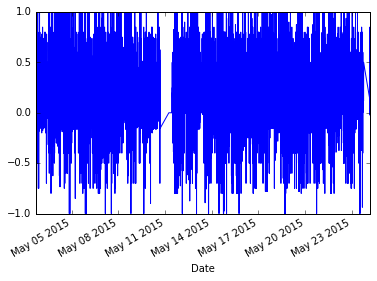

In [19]:
###############
#### TO DO ####
###############

# plot the sentiment as a line graph

tweets.sentiment.plot(kind='line')



/Users/sinanozdemir/anaconda/envs/sfdat26-env/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  from ipykernel import kernelapp as app


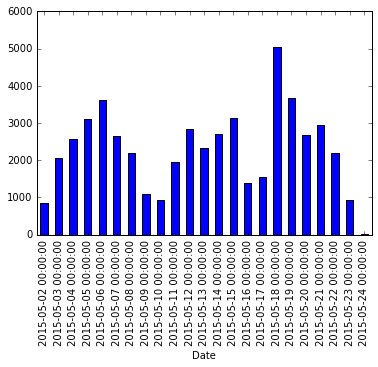

In [20]:
# plot the volume of tweets
tweets.resample('D', how='count').Status.plot(kind='bar')

In [16]:
# look at tweets on the 24th of May
tweets['2015-5-24']

,Text,Date,Status,Retweet,sentiment
Date,,,,,
2015-05-24 03:46:08,RT @j_o_h_n_danger: $TWTR now top holding for ...,2015-05-24 03:46:08,602319644234395648,6.022899e+17,0.500000
2015-05-24 04:17:42,RT diggingplatinum RT WWalkerWW: iOS 9 vs. And...,2015-05-24 04:17:42,602327586983796737,NaN,0.136364
2015-05-24 04:13:22,RT bosocial RT insidermonkey RT j_o_h_n_danger...,2015-05-24 04:13:22,602326499534966784,NaN,0.500000
2015-05-24 04:08:34,RT @WWalkerWW: iOS 9 vs. Android M – The New F...,2015-05-24 04:08:34,602325288740114432,6.023104e+17,0.136364
2015-05-24 04:04:42,RT @seeitmarket: Apple Chart Update: Big Test ...,2015-05-24 04:04:42,602324318903771136,6.023215e+17,0.000000
2015-05-24 04:00:01,Free Video: One Day Range Leaders http://t.co/...,2015-05-24 04:00:01,602323139297705984,NaN,0.400000
2015-05-24 03:54:07,Option Millionaires: golfnara: $AAPL 135.79 ht...,2015-05-24 03:54:07,602321653645709313,NaN,0.000000
2015-05-24 04:25:29,RT @AppleReporter: What to Do When Your #iPhon...,2015-05-24 04:25:29,602329548860993537,6.013210e+17,0.000000
2015-05-24 04:24:47,RT @AppleReporter: Apple Near All-Time High!\n...,2015-05-24 04:24:47,602329372083650560,6.021077e+17,0.150000


In [21]:
# get historical prices
# pip install yahoo_finance
from yahoo_finance import Share
yahoo = Share('AAPL')
historical_prices = yahoo.get_historical('2015-05-2', '2015-05-25')
prices = pd.DataFrame(historical_prices)

In [22]:
prices.head()

,Adj_Close,Close,Date,High,Low,Open,Symbol,Volume
0,129.180748,132.539993,2015-05-22,132.970001,131.399994,131.600006,AAPL,45596000
1,128.059901,131.389999,2015-05-21,131.630005,129.830002,130.070007,AAPL,39730400
2,126.763608,130.059998,2015-05-20,130.979996,129.339996,130.00,AAPL,36454900
3,126.773364,130.070007,2015-05-19,130.880005,129.639999,130.690002,AAPL,44633200
4,126.890318,130.190002,2015-05-18,130.720001,128.360001,128.380005,AAPL,50882900


In [23]:
prices.index = pd.to_datetime(prices['Date'])

In [24]:
not_null_close = prices[prices.Close.notnull()]

In [27]:
not_null_close.head()

,Adj_Close,Close,Date,High,Low,Open,Symbol,Volume
Date,,,,,,,,
2015-05-22,129.180748,132.539993,2015-05-22,132.970001,131.399994,131.600006,AAPL,45596000
2015-05-21,128.059901,131.389999,2015-05-21,131.630005,129.830002,130.070007,AAPL,39730400
2015-05-20,126.763608,130.059998,2015-05-20,130.979996,129.339996,130.00,AAPL,36454900
2015-05-19,126.773364,130.070007,2015-05-19,130.880005,129.639999,130.690002,AAPL,44633200
2015-05-18,126.890318,130.190002,2015-05-18,130.720001,128.360001,128.380005,AAPL,50882900


In [28]:
not_null_close.info() #the columns aren't numbers!

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15 entries, 2015-05-22 to 2015-05-04
Data columns (total 8 columns):
Adj_Close    15 non-null object
Close        15 non-null object
Date         15 non-null object
High         15 non-null object
Low          15 non-null object
Open         15 non-null object
Symbol       15 non-null object
Volume       15 non-null object
dtypes: object(8)
memory usage: 1.1+ KB


In [29]:
# cast as numbers
not_null_close.Volume = not_null_close.Volume.astype('int')
not_null_close.Close = not_null_close.Close.astype('float')

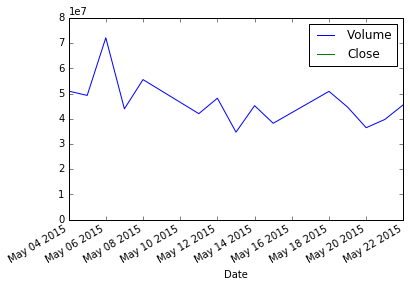

In [30]:
###############
#### TO DO ####
############### 

# plot both volume and close as line graphs in the same graph, what do you notice is the problem?


In [31]:
###############
#### TO DO ####
############### 

# concatinate not_null_close.Close, and daily_tweets.sentiment


In [32]:
merged

,Close,sentiment
Date,,
2015-05-02,NaN,0.083031
2015-05-03,NaN,0.107045
2015-05-04,128.699997,0.084062
2015-05-05,125.800003,0.063895
2015-05-06,125.010002,0.067004
2015-05-07,125.260002,0.078972
2015-05-08,127.620003,0.102869
2015-05-09,NaN,0.118071
2015-05-10,NaN,0.094882


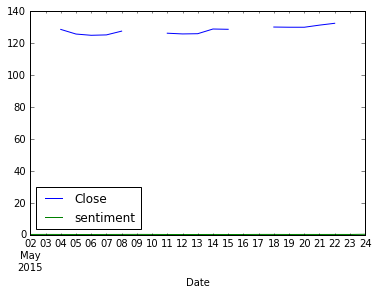

In [33]:
merged.plot()
# wow that looks awful

In [37]:
###############
#### TO DO ####
############### 

# First delete any rows with missing values in any column



In [51]:
# scale the columns by z scores using StandardScaler
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
merged_scaled = s.fit_transform(merged)
merged_scaled[:5,]

array([[ 0.22959679,  0.48903823],
       [-1.02827619, -0.89329167],
       [-1.37093928, -0.680184  ],
       [-1.26250173,  0.14011607],
       [-0.23885082,  1.778188  ]])

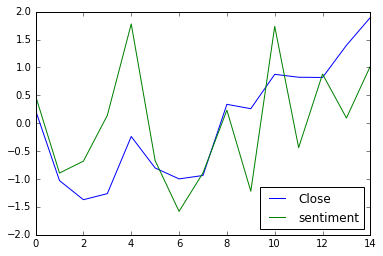

In [53]:
pd.DataFrame(merged_scaled, columns=merged.columns).plot()
# notice how sentiment seems to follow the closing price

In [ ]:
###############
#### TO DO ####
############### 

# use lda to find 7 potential topics of this text, what do you notice?

